# Logistic Regression

---
**Git repo shorturl.at/cqEI3**

By - Kapil Panwar


[Git](shorturl.at/cqEI3)
[Whatsapp](https://qrgo.page.link/TMiTp) & 
[YouTUBE](https://qrgo.page.link/wh5tq)

## What is Regression?

- In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features'). 

- The most common form of regression analysis is linear regression, in which a researcher finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion. 

![image](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)

- Regression models predict a value of the Y variable given known values of the X variables. Prediction within the range of values in the dataset used for model-fitting is known informally as interpolation. Prediction outside this range of the data is known as extrapolation. Performing extrapolation relies strongly on the regression assumptions. The further the extrapolation goes outside the data, the more room there is for the model to fail due to differences between the assumptions and the sample data or the true values.

## What is Logistic Regression?

- Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

- In simple words, the **dependent variable is binary in nature** having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

- Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

![image](https://www.tutorialspoint.com/machine_learning_with_python/images/binary_logistic_regression_model.jpg)

## Why Logistic Regression is being used?

- All classification algorithms predict the class name based on variour features. Where as Logistic Regression is the one which produce probability of every event.

- As it is based on probability theory, output is restricted between 0 to 1.

- To make classifier out of generated probabilities, thresolding is being used.

- In general **Sigmoid function** is used to create threshold.

- Only ML model where pred_output provides **class_name with probability**.

## Applications of Logistic Regression

Logistic regression is used in various fields, including machine learning, most medical fields, and social sciences. For example, 

- **The Trauma and Injury Severity Score (TRISS)**, which is widely used to predict mortality in injured patients, was originally developed by Boyd et al. using logistic regression. Many other medical scales used to assess severity of a patient have been developed using logistic regression. 

- **To predict the risk of developing a given disease** (e.g. diabetes; coronary heart disease), based on observed characteristics of the patient (age, sex, body mass index, results of various blood tests, etc.).

- To predict whether a Nepalese **voter will vote Congress or BJP Party** of Nepal or Any Other Party, based on age, income, sex, race, state of residence, votes in previous elections, etc. 

- **Engineering Domain**, especially for predicting the probability of failure of a given process, system or product. 

- **Marketing Applications** such as prediction of a customer's propensity to purchase a product or halt a subscription, etc. 

- In **economics** it can be used to predict the likelihood of a person's choosing to be in the labor force, and a business application would be to predict the likelihood of a homeowner defaulting on a mortgage. 

## Live Demo

Let's try the famous titanic survival case. 

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

|Variable|	Definition	|Key|
|--|--|--|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	||
|Age|	Age in years|	|
|sibsp|	# of siblings / spouses aboard the Titanic||	
|parch|	# of parents / children aboard the Titanic|	|
|ticket|	Ticket number|	|
|fare|	Passenger fare	||
|cabin|	Cabin number	||
|embarked|	Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


*Variable Notes*

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train data set
df = pd.read_csv("./Titanic_dataset/train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

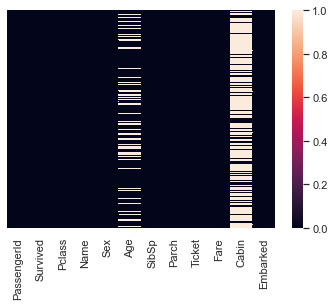

In [7]:
sns.heatmap(df.isnull(), yticklabels=False)

<AxesSubplot:>

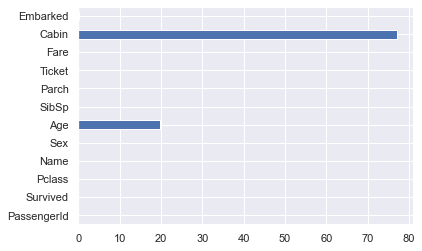

In [10]:
(df.isnull().sum()/len(df)*100).plot(kind = 'barh')

In [12]:
df = df.drop("Cabin", axis = 1)

<AxesSubplot:>

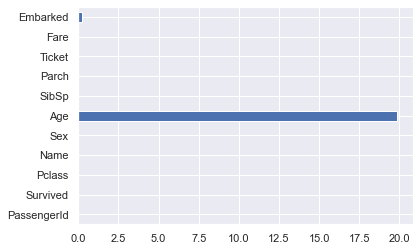

In [13]:
(df.isnull().sum()/len(df)*100).plot(kind = 'barh')

In [14]:
df = df.dropna()

<AxesSubplot:>

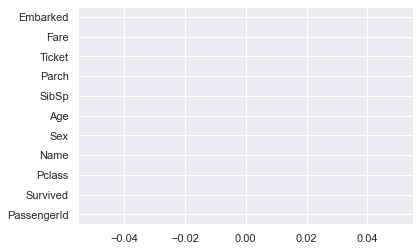

In [15]:
(df.isnull().sum()/len(df)*100).plot(kind = 'barh')

<AxesSubplot:>

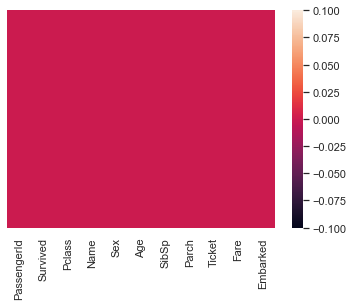

In [16]:
sns.heatmap(df.isnull(), yticklabels=False)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df = df.drop("PassengerId", axis = 1)

In [21]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

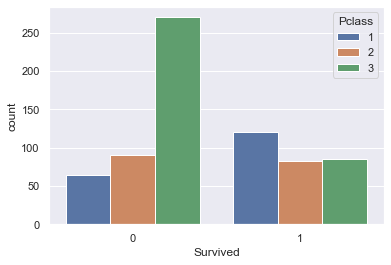

In [22]:
sns.countplot(x = 'Survived', hue = 'Pclass', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

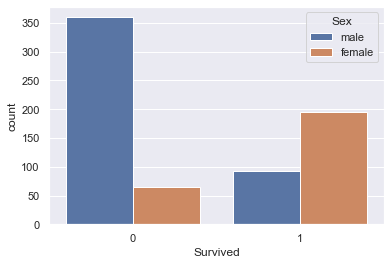

In [23]:
sns.countplot(x = 'Survived', hue = 'Sex', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

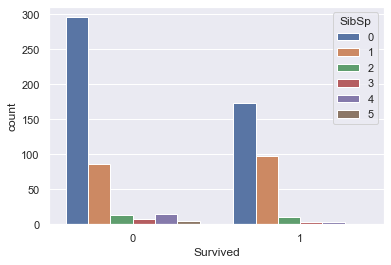

In [24]:
sns.countplot(x = 'Survived', hue = 'SibSp', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

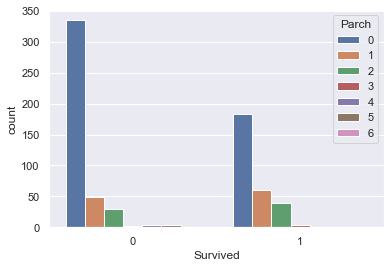

In [25]:
sns.countplot(x = 'Survived', hue = 'Parch', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

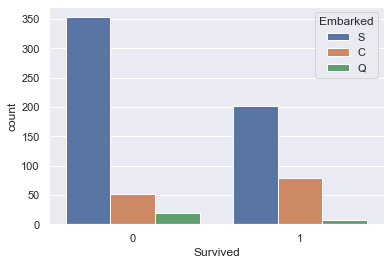

In [26]:
sns.countplot(x = 'Survived', hue = 'Embarked', data= df)

In [32]:
#sex = pd.get_dummies(df['Sex'], drop_first=True)
#df = df.drop("Sex", axis = 1)
df = pd.concat([df,sex], axis = 1)
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


In [33]:
pclass = pd.get_dummies(df['Pclass'], drop_first=True)
df = df.drop("Pclass", axis = 1)
df = pd.concat([df,pclass], axis = 1)
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1,0,1


In [34]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)
df = df.drop("Embarked", axis = 1)
df = pd.concat([df,embarked], axis = 1)
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,2,3,Q,S
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1


In [35]:
df = df.drop("Name", axis = 1)
df.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,male,2,3,Q,S
0,0,22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,35.0,1,0,113803,53.1000,0,0,0,0,1
4,0,35.0,0,0,373450,8.0500,1,0,1,0,1


In [36]:
df = df.drop("Ticket", axis = 1)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [40]:
df.describe()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,29.642093,0.514045,0.432584,34.567251,0.636236,0.242978,0.498596,0.039326,0.778090
std,0.491139,14.492933,0.930692,0.854181,52.938648,0.481420,0.429183,0.500350,0.194506,0.415823
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,28.000000,0.000000,0.000000,15.645850,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X = df.drop("Survived", axis = 1).values
y = df['Survived']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [51]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [52]:
y_predict

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [53]:
accuracy_score(y_test, y_predict)

0.7552447552447552

In [54]:
confusion_matrix(y_test, y_predict)

array([[70, 19],
       [16, 38]])

In [55]:
(70+38)/(70+19+16+38)

0.7552447552447552